## Poly HW
10.8.25

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# LinearRegression pipeline

Intercept (β₀): 3.6950
Coefficient for x (β₁): 0.0799
Coefficient for x² (β₂): -0.000130
Polynomial equation: y = 3.695 + (0.07994)x + (-0.00012955)x²
Optimal fertilizer amount: 308.54 kg
Predicted maximum yield: 16.03 tons


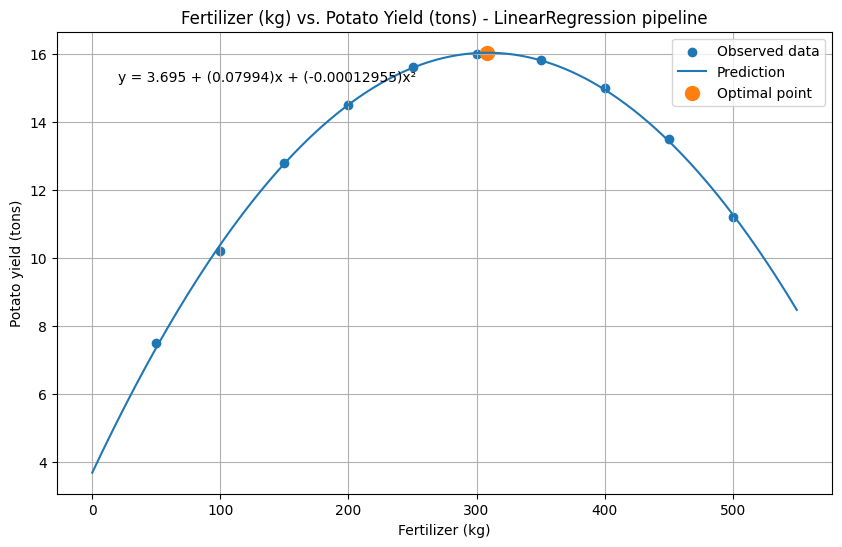

In [30]:
# Data from the table
fertilizer_kg = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]).reshape(-1, 1)
potatoes_t = np.array([7.5, 10.2, 12.8, 14.5, 15.6, 16.0, 15.8, 15.0, 13.5, 11.2])

# Polynomial regression model (quadratic = degree 2)
polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),   # keep same as your template
    ('linear', LinearRegression())
])

# Fit
polynomial_model.fit(fertilizer_kg, potatoes_t)

# Coefficients
coefficients = polynomial_model.named_steps['linear'].coef_
intercept = polynomial_model.named_steps['linear'].intercept_

print(f"Intercept (β₀): {intercept:.4f}")
print(f"Coefficient for x (β₁): {coefficients[1]:.4f}")
print(f"Coefficient for x² (β₂): {coefficients[2]:.6f}")

# Equation string
equation = f"y = {intercept:.3f} + ({coefficients[1]:.5f})x + ({coefficients[2]:.8f})x²"
print("Polynomial equation:", equation)


# Optimal fertilizer (vertex of the parabola)
optimal_fertilizer = -coefficients[1] / (2 * coefficients[2])
predicted_max_yield = polynomial_model.predict([[optimal_fertilizer]])[0]
print(f"Optimal fertilizer amount: {optimal_fertilizer:.2f} kg")
print(f"Predicted maximum yield: {predicted_max_yield:.2f} tons")

# Create smooth curve for plotting across a reasonable range
x_curve = np.linspace(0, 550, 200).reshape(-1, 1)
y_curve = polynomial_model.predict(x_curve)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(fertilizer_kg, potatoes_t, label='Observed data')
plt.plot(x_curve, y_curve, label='Prediction')
plt.scatter([[optimal_fertilizer]], [[predicted_max_yield]], s=100, label='Optimal point')

plt.title('Fertilizer (kg) vs. Potato Yield (tons) - LinearRegression pipeline')
plt.xlabel('Fertilizer (kg)')
plt.ylabel('Potato yield (tons)')
plt.grid(True)
plt.legend()

# Show equation on the plot
plt.text(20, max(potatoes_t) * 0.95, equation, fontsize=10)

plt.show()

# np.polyfit

Coefficient for x² (a): -0.000130
Coefficient for x  (b): 0.079941
Intercept       (c): 3.695000
Polynomial equation: y = 3.695 + (0.07994)x + (-0.00012955)x²
Optimal fertilizer amount: 308.54 kg
Predicted maximum yield:   16.03 tons


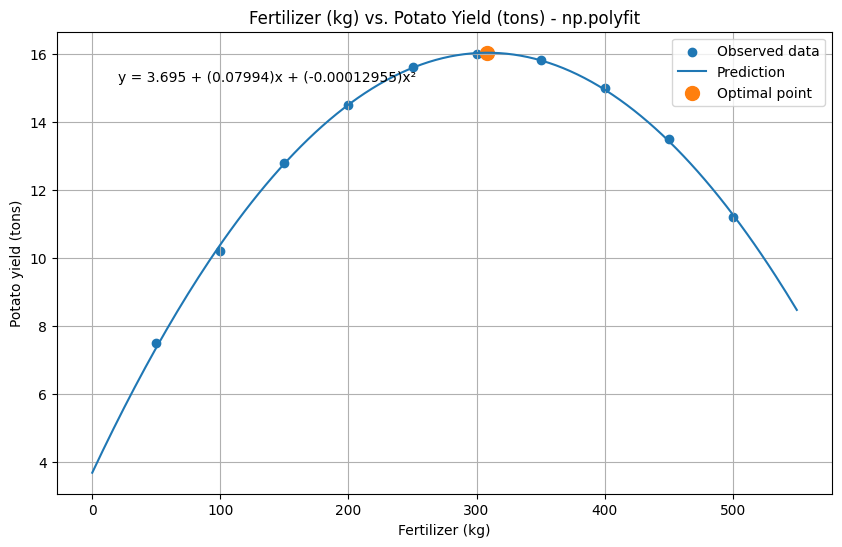

In [33]:
# Data: fertilizer (kg) vs potato yield (tons)
fertilizer_kg = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
potatoes_t   = np.array([7.5, 10.2, 12.8, 14.5, 15.6, 16.0, 15.8, 15.0, 13.5, 11.2])

# Fit a quadratic with np.polyfit (returns [a, b, c] for ax^2 + bx + c)
coefficients = np.polyfit(fertilizer_kg, potatoes_t, 2)
a, b, c = coefficients

print(f"Coefficient for x² (a): {a:.6f}")
print(f"Coefficient for x  (b): {b:.6f}")
print(f"Intercept       (c): {c:.6f}")

# Equation string
equation = f"y = {c:.3f} + ({b:.5f})x + ({a:.8f})x²"
print("Polynomial equation:", equation)

# Vertex (optimal fertilizer). For a<0 it's a maximum (what we expect).
optimal_fertilizer = -b / (2 * a)
poly_function = np.poly1d(coefficients)
predicted_yield = poly_function(optimal_fertilizer)

print(f"Optimal fertilizer amount: {optimal_fertilizer:.2f} kg")
print(f"Predicted maximum yield:   {predicted_yield:.2f} tons")

# Smooth curve for plotting
x_curve = np.linspace(0, 550, 200)
y_curve = poly_function(x_curve)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(fertilizer_kg, potatoes_t, label='Observed data')
plt.plot(x_curve, y_curve, label='Prediction')
plt.scatter([optimal_fertilizer], [predicted_yield], s=100, label='Optimal point')

plt.title('Fertilizer (kg) vs. Potato Yield (tons) - np.polyfit')
plt.xlabel('Fertilizer (kg)')
plt.ylabel('Potato yield (tons)')
plt.grid(True)
plt.legend()

# Display equation on the graph
y_text = potatoes_t.max() * 0.95
plt.text(20, y_text, equation, fontsize=10)

plt.show()